<a href="https://colab.research.google.com/github/jcmachicao/MachineLearningAvanzado_UC_2024/blob/main/U3__explain_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demostración de Explicación LIME
(LIME: Local Interpretable Model-agnostic Explainer)

* **Instancias de muestreo**: LIME perturba el punto de datos original modificando aleatoriamente sus características. Esto crea un conjunto de puntos de datos nuevos y similares.
* **Predicción con el modelo de caja negra**: cada punto de datos perturbado se introduce en la red neuronal original para obtener una predicción.
* **Ponderación de instancias**: LIME asigna pesos a las instancias perturbadas en función de su proximidad al punto de datos original. Las instancias más cercanas al punto original tienen pesos más altos.
* **Ajuste de un modelo local**: se ajusta un modelo simple e interpretable (como una regresión lineal) a los puntos de datos perturbados y sus predicciones correspondientes. Los coeficientes de este modelo local representan la importancia de cada característica en la predicción.

In [ ]:
!pip install lime

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
data = {'col1': np.random.choice(['A', 'B', 'C'], 100),
        'col2': np.random.choice(['X', 'Y', 'Z'], 100),
        'col3': np.random.choice(['1', '2', '3'], 100)}
df = pd.DataFrame(data)

df['target'] = np.random.choice(['class1', 'class2', 'class3'], 100)

In [5]:
le = LabelEncoder()
for col in df.columns[:-1]:
    df[col] = le.fit_transform(df[col])

# One-hot encode features
enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(df.drop('target', axis=1))
y = le.fit_transform(df['target'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [9]:
# Crea el explicador LIME
explainer = lime_tabular.LimeTabularExplainer(X_train, mode='classification',
                                            feature_names=enc.get_feature_names_out().tolist(),
                                            class_names=le.classes_)

In [10]:
# Escoge qué variable va a explicar
idx = 0
instance = X_test[idx]

In [11]:
exp = explainer.explain_instance(instance, model.predict_proba, num_features=3)
exp.as_list()

[('col1_1 <= 0.00', -0.14330242660312734),
 ('col3_0 <= 0.00', 0.1413091802459706),
 ('col2_2 <= 0.00', -0.10618768427698119)]

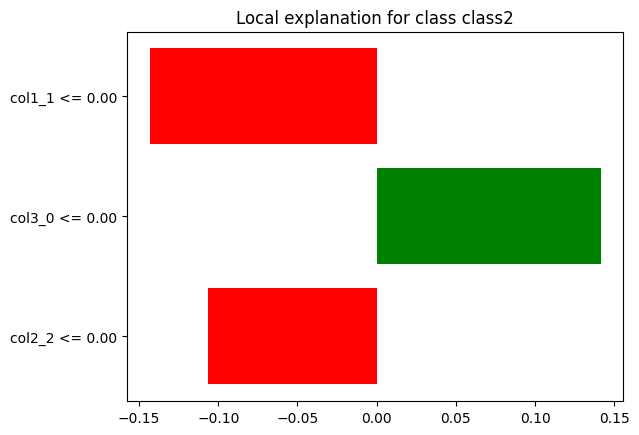

In [14]:
exp.as_pyplot_figure()
plt.show()